# Les K plus proches voisins & Arbres de décision 

## Partie I: K plus proches voisins (KNN : k nearest neighbors)

## A. Algorithme
Le KNN est un algorithme de classification supervisé. Pour chaque entrée $x_{i}=(x^{1}_{i}, x^{1}_{i}, x^{2}_{i}, ... x^{n}_{i}) $ il faut disposer de la sortie $y_{i}$ correspondante (la classe correspondante)

Pour savoir à quelle classe $y_{i}$ un vecteur x apartient il faut:
- Calculer la distance (euclidienne) du vecteur x à tous les examples $x_{i}$
- trouver les k exemple les plus proche de x
- x appartient à la classe majoritairement representé par ces k éléments 

#### Q1. utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer trois classes puis visualiser ces trois classe comme suivants:
*   rouge: y=0
*   blue: y=1
*   vert: y=2
*   Orange: y=3

l'argument ***cluster_std*** affecte le chevauchement entre les classe

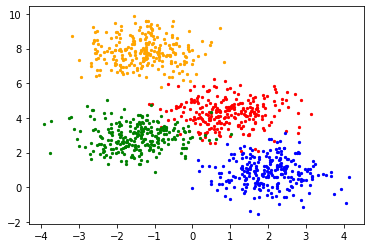

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [50]:
X, Y= make_blobs(n_samples=2000, centers=4, cluster_std=0.70, random_state=0)

df = pd.DataFrame(X)

df


,0,1
0,-0.783784,2.088461
1,0.055135,3.980678
2,2.193747,0.966089
3,-1.482100,8.470821
4,-1.691081,2.313533
...,...,...
1995,-1.142767,8.322323
1996,-0.007904,3.890747
1997,1.018196,4.155021
1998,-0.871147,3.457114


[False  True False ...  True False  True]
[False False  True ... False False False]
[ True False False ... False  True False]
[False False False ... False False False]


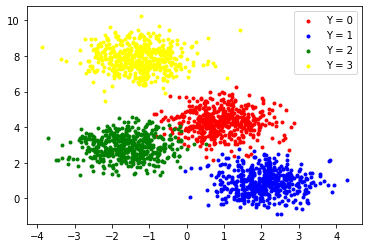

In [51]:
#x, y = np.array(df[0]), np.array(df[1])
colors = ['red', 'blue', 'green', 'yellow']
for k, col in enumerate(colors):
    cluster_data = Y == k
    print(cluster_data)
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker='.', s=35, label= 'Y = ' + str(k))

plt.legend()
plt.show()

#### Q2. Ecrire une fonction knn(x,X_train,y_train,k) pour predire la classe de x avec l'algorithme du kNN 

In [93]:

def knn(x, X, Y, k):
    listDistances = []
    for e in range(X.shape[0]) :
        distance = np.sqrt((X[e][0] - x[0])**2 + (X[e][1] - x[1])**2)
        listDistances.append(distance)
    data = {
        'distance':listDistances,
        'y':Y
    }
    dfDistances = pd.DataFrame(data, columns=['distance', 'y'])
    dfDistances = dfDistances.sort_values(by=['distance'])
    dfDistances = dfDistances.reset_index().drop(['index'], axis = 1).head(k)
    
    v = dfDistances['y'].value_counts()
    print(v)
    maxClass = max(v)
    for e in v.keys():
        if v[e] == maxClass:
            classe = e
    return classe


In [99]:
knn([2, 3], X, Y, 4)

0    3
1    1
Name: y, dtype: int64


0

#### Q3. A quelle classe apartient les trois points suivants: x1=(-2,5); x2(-1,6) et x3=(0,2) pour k=3,5 et 7 respectivement

## B. Utilisation des modules python
Le module ***KNeighborsClassifier*** de ***sklearn.neighbors*** permet de initialiser un modele kNN avec un parametre k ***KNeighborsClassifier(k)*** en entraine ce modele avce la sa méthode ***fit(x_train,y_train)*** puis la prediction avec sa methode ***predict(x)***
#### Q1. Utiliser 75% des données precedentes pour entrainer ce modèle puis afficher la matrice de confusion et la precision de ce modèle pour k=1, 3, 5 ... 11
Utiliser la méthode accuracy_score(y_test, y_pred) de sklearn.metrics pour calculer la precision (accuracy) du modèle

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knnSK(k):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return round(acc, 2) * 100

In [123]:
knnSK(3)

98.0

#### Q2. Trace la precision de ce modele en fonction de k. quel valeur de k choisir pour ce problème?



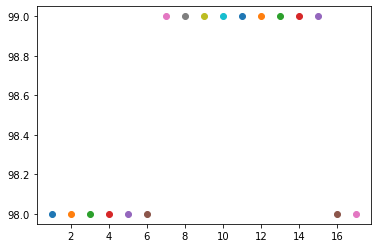

In [124]:
for e in range(1, 18):
    plt.scatter(e, knnSK(e))
plt.show()